In [2]:

"""===================================================
    Preparation de la base de données 
==================================================="""
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


Data_Directory = '../Codes/MMU-Iris-Database'

personnes = [str(p) for p in range(1, 47)]
eyes = ['left', 'right']

dataset = []
target = []
names = []


for prsn in personnes:
    if prsn == "4":
        continue

    path = os.path.join(Data_Directory, prsn)
    
    for eye in eyes:
        path2 = os.path.join(path, eye)
        for img in os.listdir(path2):
            if ".bmp" not in img:
                continue       
            img_array = cv2.imread(os.path.join(path2, img),cv2.IMREAD_GRAYSCALE)
            img_array = np.reshape(img_array,(-1,240*320))
            dataset.append(img_array[0])
            target.append(int(prsn))
            names.append(os.path.splitext(img)[0][:-2])



In [3]:

"""========================================================================
    450 images de 45 personnes sont stockées dans notre jeu de données
==========================================================================="""

print(len(dataset))
print(len(target))
print(len(names))



450
450
450


In [4]:

"""===========================
    Affichage des données
==============================="""
import pandas as pd


tableau = pd.DataFrame(
    {
        'eye image':dataset[:],
        'personne':target[:],
        'name':names[:]
    }
)


tableau



,eye image,personne,name
0,"[248, 248, 245, 239, 238, 242, 247, 237, 248, ...",1,aeva
1,"[189, 224, 248, 248, 248, 231, 218, 226, 232, ...",1,aeva
2,"[248, 248, 248, 248, 248, 248, 248, 248, 248, ...",1,aeva
3,"[248, 248, 248, 248, 245, 245, 248, 247, 248, ...",1,aeva
4,"[247, 230, 223, 208, 189, 215, 246, 248, 239, ...",1,aeva
...,...,...,...
445,"[170, 170, 170, 186, 165, 168, 183, 190, 194, ...",46,zulaikah
446,"[191, 186, 190, 183, 174, 189, 186, 186, 186, ...",46,zulaikah
447,"[245, 221, 224, 194, 159, 160, 178, 183, 179, ...",46,zulaikah
448,"[245, 194, 149, 157, 163, 165, 161, 176, 178, ...",46,zulaikah


In [6]:

"""====================================================================================
    Subdivision de la base de données "iris" en base d'apprentissage et base de test
======================================================================================"""

import numpy as np
from sklearn.model_selection import train_test_split

dataset = np.array(dataset)
target= np.array(target)



X_train, X_test, Y_train, Y_test = train_test_split(dataset, target,test_size=0.2)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



(360, 76800)
(360,)
(90, 76800)
(90,)


(76800,)


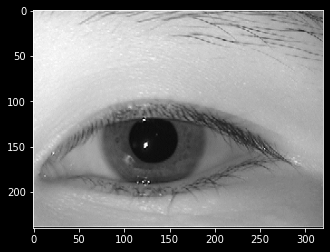

In [7]:

"""====================================================================================
    Pour vérifier que nos vecteurs images sont bien transformés
===================================================================================="""

import matplotlib.pyplot as plt 

plt.imshow(np.reshape(X_test[0],(240,320)), cmap=plt.cm.gray)
print(X_test[0].shape)



In [8]:

"""===========================
    Classificaion par SVM
==========================="""

from sklearn.svm import SVC

svmc = SVC().fit(X_train,Y_train)
print('Train score : %.2f' % (svmc.score(X_train, Y_train)*100) + '%')
print('Test score %.2f' % (svmc.score(X_test, Y_test)*100) + '%')



Train score : 72.78%
Test score 28.89%


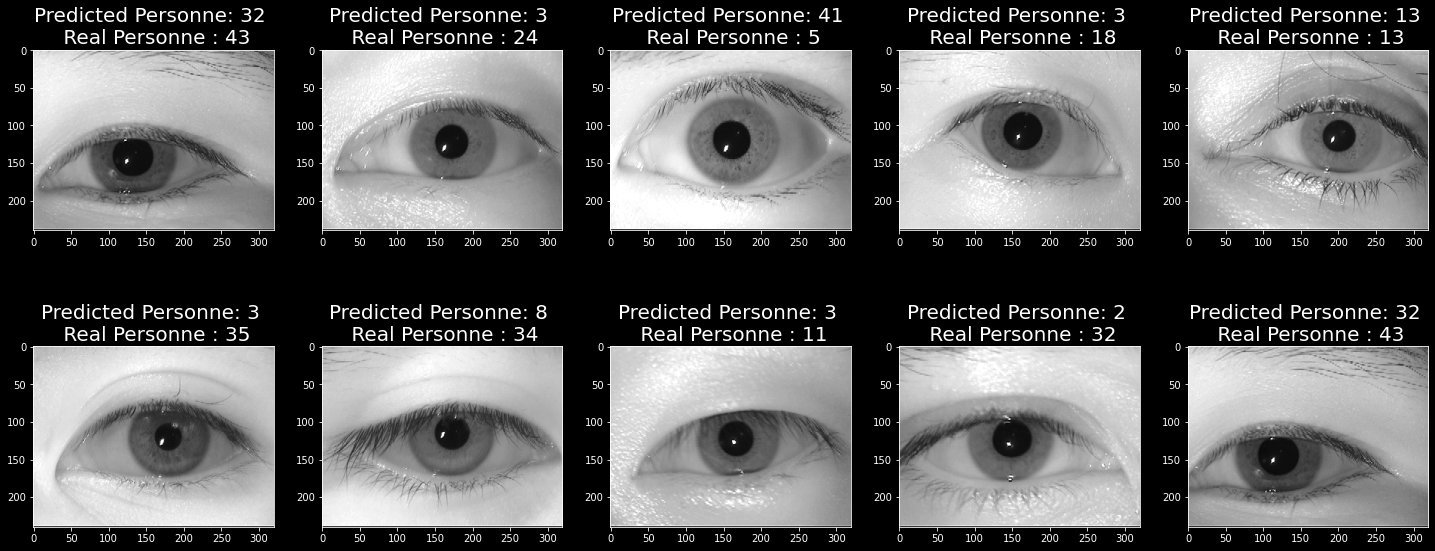

In [9]:

"""=============================================================
    Les 10 premiers images dans X_test et leurs prédictions 
================================================================"""

predictions = svmc.predict(X_test)

plt.figure(figsize=(25 , 10))
for i, (image, label) in enumerate(zip(X_test[0:10], predictions[0:10])):
    plt.subplot(2,5, i+ 1)
    plt.imshow(np.reshape(image,(240,320)), cmap=plt.cm.gray)
    plt.title('Predicted Personne: %i \n Real Personne : %i' % (label , Y_test[i] ) ,fontsize=20)
    


In [10]:

"""=============================================================================================================================
    SVM a une très faible précision  , nous avons éssayer de utiliser des déffirent kernels pour avoir une plus grande précision
================================================================================================================================"""


kernels = ['Polynomial', 'Radial Basis Function ', 'Sigmoid','Linear']
def Classifier(kernel_type):
    if kernel_type == 0:
        return SVC(kernel='poly', degree=8, gamma="auto")

    elif kernel_type == 1:      
        return SVC(kernel='rbf', gamma="auto")

    elif kernel_type == 2:    
        return SVC(kernel='sigmoid', gamma="auto")

    elif kernel_type == 3:
        return SVC(kernel='linear', gamma="auto")
  



In [11]:

for i in range(4):   
    X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size = 0.20)
    svmc = Classifier(i) 
    svmc.fit(X_train, Y_train)
    print("Score de ", kernels[i], "kernel :")
    print('%.2f' % (svmc.score(X_test, Y_test)*100) + '%')



Score de  Polynomial kernel :
64.44%
Score de  Radial Basis Function  kernel :
0.00%
Score de  Sigmoid kernel :
0.00%
Score de  Linear kernel :
76.67%


In [13]:

"""=======================================================================================
    La classification des images par SVM avec Linear kernel a la plus grande précision
=========================================================================================="""

X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size = 0.1)
svmc = SVC(kernel='linear', gamma="auto").fit(X_train, Y_train)
print('Train score : %.2f' % (svmc.score(X_train, Y_train)*100) + '%')
print('Test score %.2f' % (svmc.score(X_test, Y_test)*100) + '%')
score = svmc.score(X_test, Y_test)*100



Train score : 100.00%
Test score 75.56%


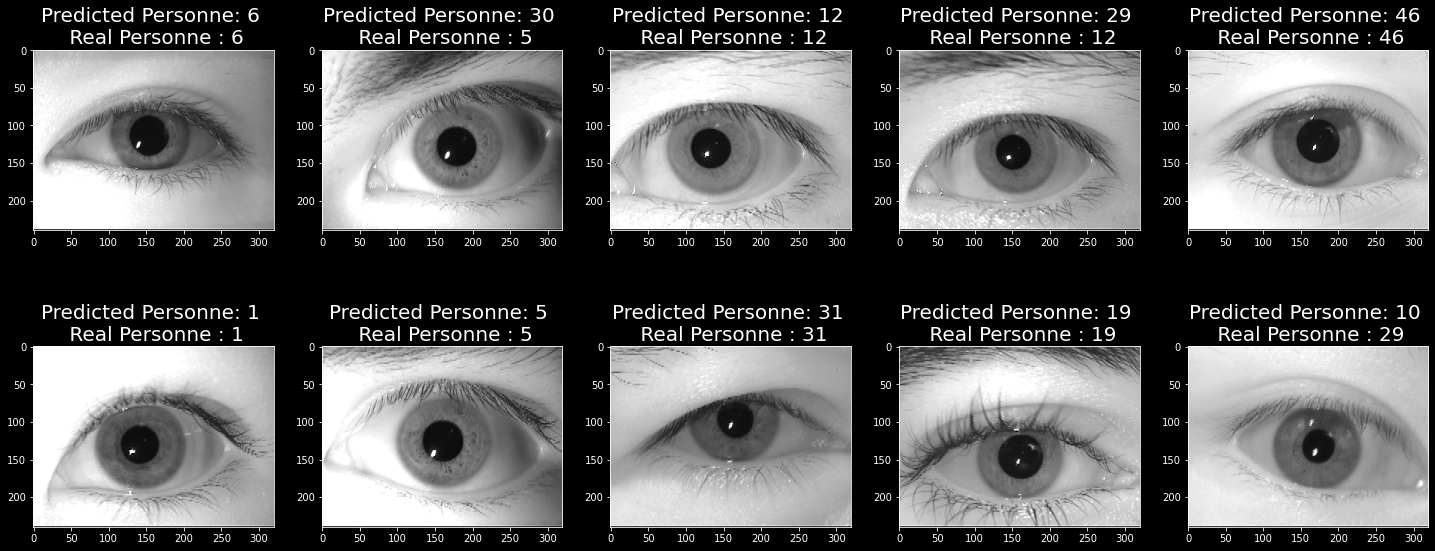

In [14]:

"""=============================================================
    Les 10 premiers images dans X_test et leurs prédictions 
================================================================"""

predictions = svmc.predict(X_test)

plt.figure(figsize=(25 , 10))
for i, (image, label) in enumerate(zip(X_test[0:10], predictions[0:10])):
    plt.subplot(2,5, i+ 1)
    plt.imshow(np.reshape(image,(240,320)), cmap=plt.cm.gray)
    plt.title('Predicted Personne: %i \n Real Personne : %i' % (label , Y_test[i] ) ,fontsize=20)
    

In [15]:

"""================================================================
    La classification des images par SVM avec Linear kernel 
==================================================================="""

from sklearn.metrics import classification_report,confusion_matrix


print('Linear kernel score : %.2f' % score + '%')

print(classification_report(Y_test,predictions))

targets_names = np.array(np.reshape(names,(-1,45)))
print(targets_names[0])



Linear kernel score : 75.56%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         2
          11       0.00      0.00      0.00         0
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\App

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
(34, 34)


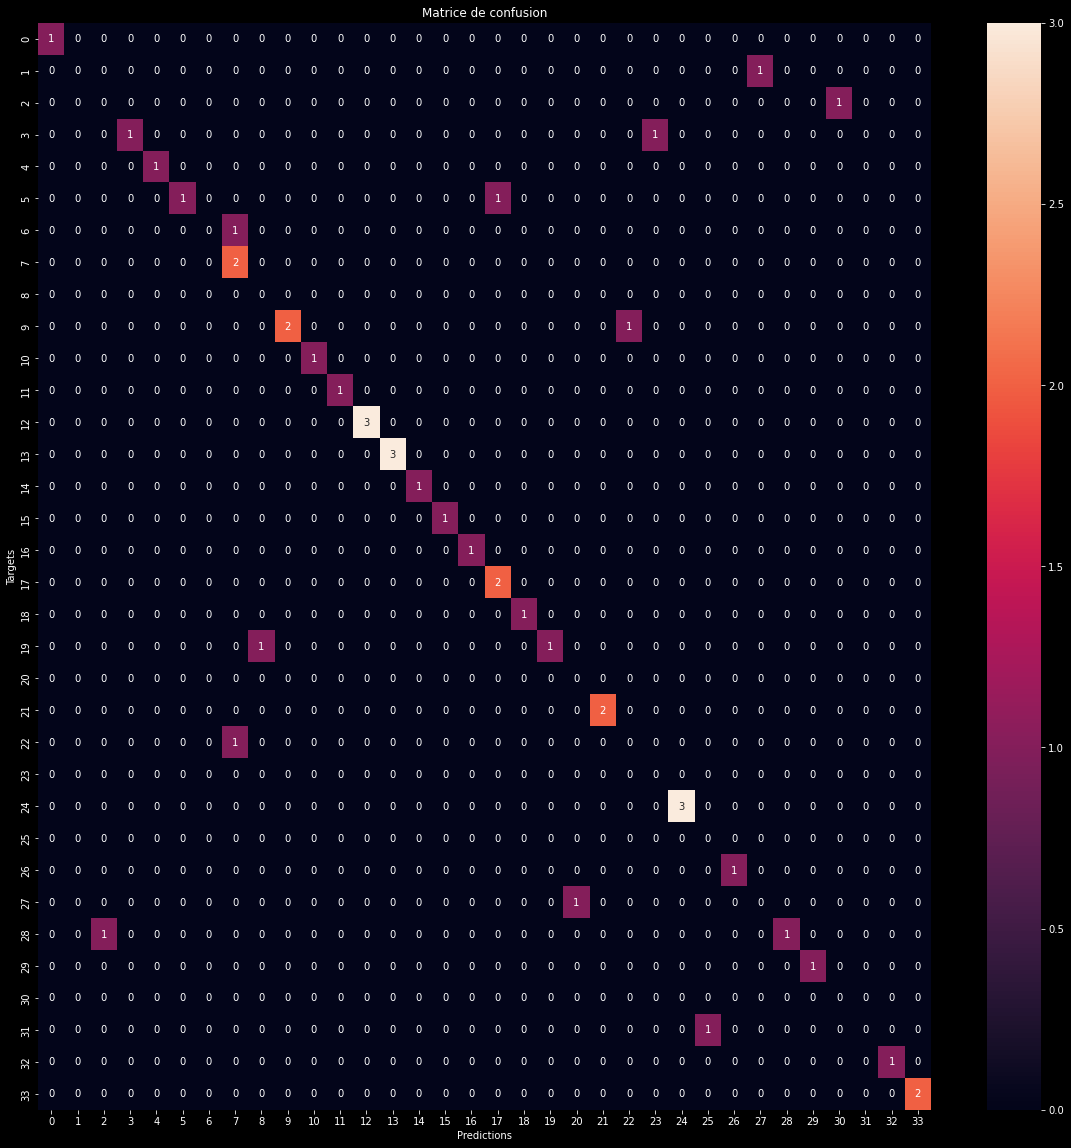

In [16]:

"""================================================================
    La classification des images par SVM avec Linear kernel 
==================================================================="""
import seaborn as sb
import matplotlib.pyplot as plt

matrice = confusion_matrix(Y_test,predictions)
print(matrice)
print(matrice.shape)

plt.subplots(figsize=(20, 20))
sb.heatmap(matrice, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Targets")
plt.title("Matrice de confusion")
plt.show()




In [17]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(dataset, target,test_size=0.2)


knn = KNeighborsClassifier(n_neighbors=1).fit(X_train,Y_train)
print('%.2f' % (knn.score(X_train, Y_train)*100) + '%')
print('%.2f' % (knn.score(X_test, Y_test)*100) + '%')

100.00%
74.44%


In [22]:

from sklearn.ensemble import RandomForestClassifier


X_train, X_test, Y_train, Y_test = train_test_split(dataset, target,test_size=0.2)

rfc = RandomForestClassifier(n_estimators= 1000, oob_score = True, n_jobs = -1, max_features = "sqrt").fit(X_train,Y_train)
print('%.2f' % (rfc.score(X_train, Y_train)*100) + '%')
print('%.2f' % (rfc.score(X_test, Y_test)*100) + '%')



100.00%
62.22%


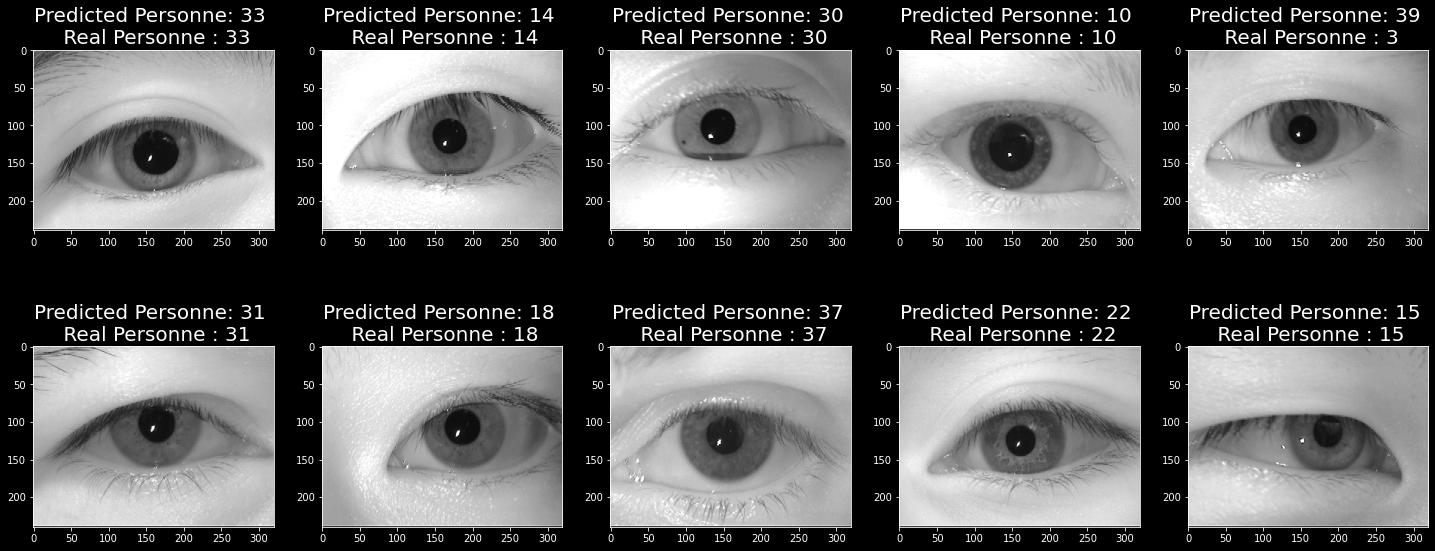

In [21]:
predictions = svmc.predict(X_test)

plt.figure(figsize=(25 , 10))
for i, (image, label) in enumerate(zip(X_test[0:10], predictions[0:10])):
    plt.subplot(2,5, i+ 1)
    plt.imshow(np.reshape(image,(240,320)), cmap=plt.cm.gray)
    plt.title('Predicted Personne: %i \n Real Personne : %i' % (label , Y_test[i] ) ,fontsize=20)